# **Benchmarking Enhanced Surface Codes for Grover’s Algorithm**
#### **Spencer Dearman** + **Victory Omole**

### **Table of Contents**
* [Imports + Loading k-SAT Q# File](#imports)
* [Qubit + QEC Scheme Configuration](#qubit-config)
* [k-SAT Estimation](#circuitsat)
    * [8 Variable Estimation](#8variables)
    * [16 Variable Estimation](#16variables)
    * [24 Variable Estimation](#24variables)
    * [32 Variable Estimation](#32variables)
    * [40 Variable Estimation](#40variables)
    * [48 Variable Estimation](#48variables)
    * [56 Variable Estimation](#56variables)
    * [64 Variable Estimation](#64variables)
* [Runtime Analysis](#runtime-analysis)
* [Curve Fitting](#curves)


#### **Importing Q# + Loading in CircuitSAT Q# File** <a id="imports"></a>

In [1]:
# %pip install qsharp qsharp_widgets matplotlib numpy scipy
import qsharp
import numpy as np
import matplotlib.pyplot as plt
from qsharp_widgets import EstimatesPanel
from scipy.optimize import curve_fit

with open("K-SAT.qs", "r") as f:
    qsharp.eval(f.read())

#### **Defining Custom Qubits** <a id="qubit-config"></a>

Using specific measurements for Sqorpius, Quantinuum H-2, and Google Sycamore Qubits

In [2]:
qubit_params = [
        {
            "qubitParams": {
                "name": "sqorpius",
                "instructionSet": "GateBased",
                "oneQubitMeasurementTime": "5 ms",
                "oneQubitGateTime": "10 µs",
                "twoQubitGateTime": "4 µs",
                "tGateTime": "50 ns",
                "oneQubitMeasurementErrorRate": 2.5e-3,
                "oneQubitGateErrorRate": 1e-4, # 99.99% Global 1Q Fidelity
                "twoQubitGateErrorRate": 5e-4, # 99.95% CZ 2Q Fidelity
                "tGateErrorRate": 1e-3
            },
            "qecScheme": {
                "name": "surface_code_1",
                "errorCorrectionThreshold": 0.0055, # 99.955 # fidelity
                "crossingPrefactor": 0.0407,
                "logicalCycleTime": "(4 * twoQubitGateTime + 2 * oneQubitMeasurementTime) * codeDistance",
                "physicalQubitsPerLogicalQubit": "61"
            },
            "estimateType": "frontier",
        },
        {
            "qubitParams": {
                "name": "sqorpius",
                "instructionSet": "GateBased",
                "oneQubitMeasurementTime": "5 ms",
                "oneQubitGateTime": "10 µs",
                "twoQubitGateTime": "4 µs",
                "tGateTime": "50 ns",
                "oneQubitMeasurementErrorRate": 2.5e-3,
                "oneQubitGateErrorRate": 1e-4,
                "twoQubitGateErrorRate": 5e-4,
                "tGateErrorRate": 1e-3
            },
            "qecScheme": {
                "name": "long_range_extended_surface_code_1",
                "errorCorrectionThreshold": 0.0055,
                "crossingPrefactor": 0.0405,
                "logicalCycleTime": "(4 * twoQubitGateTime + 2 * oneQubitMeasurementTime) * codeDistance",
                "physicalQubitsPerLogicalQubit": "61"
            },
            "estimateType": "frontier",
        },
        {
            "qubitParams": {
                "name": "sqorpius",
                "instructionSet": "GateBased",
                "oneQubitMeasurementTime": "5 ms",
                "oneQubitGateTime": "10 µs",
                "twoQubitGateTime": "4 µs",
                "tGateTime": "50 ns",
                "oneQubitMeasurementErrorRate": 2.5e-3,
                "oneQubitGateErrorRate": 1e-4,
                "twoQubitGateErrorRate": 5e-4,
                "tGateErrorRate": 1e-3
            },
            "qecScheme": {
                "name": "surface_code_2",
                "errorCorrectionThreshold": 0.0055,
                "crossingPrefactor": 0.0076,
                "logicalCycleTime": "(4 * twoQubitGateTime + 2 * oneQubitMeasurementTime) * codeDistance",
                "physicalQubitsPerLogicalQubit": "61"
            },
            "estimateType": "frontier",
        },
        {
            "qubitParams": {
                "name": "sqorpius",
                "instructionSet": "GateBased",
                "oneQubitMeasurementTime": "5 ms",
                "oneQubitGateTime": "10 µs",
                "twoQubitGateTime": "4 µs",
                "tGateTime": "50 ns",
                "oneQubitMeasurementErrorRate": 2.5e-3,
                "oneQubitGateErrorRate": 1e-4,
                "twoQubitGateErrorRate": 5e-4,
                "tGateErrorRate": 1e-3
            },
            "qecScheme": {
                "name": "long_range_extended_surface_code_2",
                "errorCorrectionThreshold": 0.0055, # 99.5% threshold
                "crossingPrefactor": 0.0057,
                "logicalCycleTime": "(4 * twoQubitGateTime + 2 * oneQubitMeasurementTime) * codeDistance",
                "physicalQubitsPerLogicalQubit": "61"
            },
            "estimateType": "frontier",
        },
        {
            "qubitParams": {
                "name": "sqorpius",
                "instructionSet": "GateBased",
                "oneQubitMeasurementTime": "5 ms",
                "oneQubitGateTime": "10 µs",
                "twoQubitGateTime": "4 µs",
                "tGateTime": "50 ns",
                "oneQubitMeasurementErrorRate": 2.5e-3,
                "oneQubitGateErrorRate": 1e-4,
                "twoQubitGateErrorRate": 5e-4,
                "tGateErrorRate": 1e-3
            },
            "qecScheme": {
                "name": "surface_code_3",
                "errorCorrectionThreshold": 0.0055,
                "crossingPrefactor": 0.0027,
                "logicalCycleTime": "(4 * twoQubitGateTime + 2 * oneQubitMeasurementTime) * codeDistance",
                "physicalQubitsPerLogicalQubit": "61"
            },
            "estimateType": "frontier",
        },
        {
            "qubitParams": {
                "name": "sqorpius",
                "instructionSet": "GateBased",
                "oneQubitMeasurementTime": "5 ms",
                "oneQubitGateTime": "10 µs",
                "twoQubitGateTime": "4 µs",
                "tGateTime": "50 ns",
                "oneQubitMeasurementErrorRate": 2.5e-3,
                "oneQubitGateErrorRate": 1e-4,
                "twoQubitGateErrorRate": 5e-4,
                "tGateErrorRate": 1e-3
            },
            "qecScheme": {
                "name": "long_range_extended_surface_code_3",
                "errorCorrectionThreshold": 0.0055,
                "crossingPrefactor": 0.0018,
                "logicalCycleTime": "(4 * twoQubitGateTime + 2 * oneQubitMeasurementTime) * codeDistance",
                "physicalQubitsPerLogicalQubit": "61"
            },
            "estimateType": "frontier",
        },
    ]

## **k-SAT Estimation** <a id="circuitsat"></a>

#### **8 Variable Estimation** <a id="8variables"></a>

In [3]:
sat_8 = qsharp.estimate(
    "KSAT.SolveSAT8()",
    qubit_params
)

EstimatesPanel(sat_8)

EstimatesPanel(estimates={0: {'status': 'success', 'jobParams': {'qecScheme': {'name': 'surface_code_1', 'erro…

#### **16 Variable Estimation** <a id="16variables"></a>

In [4]:
sat_16 = qsharp.estimate(
    "KSAT.SolveSAT16()",
    qubit_params
)

EstimatesPanel(sat_16)

EstimatesPanel(estimates={0: {'status': 'success', 'jobParams': {'qecScheme': {'name': 'surface_code_1', 'erro…

#### **24 Variable Estimation** <a id="24variables"></a>

In [5]:
sat_24 = qsharp.estimate(
    "KSAT.SolveSAT24()",
    qubit_params
)

EstimatesPanel(sat_24)

EstimatesPanel(estimates={0: {'status': 'success', 'jobParams': {'qecScheme': {'name': 'surface_code_1', 'erro…

#### **32 Variable Estimation** <a id="32variables"></a>

In [6]:
sat_32 = qsharp.estimate(
    "KSAT.SolveSAT32()",
    qubit_params
)

EstimatesPanel(sat_32)

EstimatesPanel(estimates={0: {'status': 'success', 'jobParams': {'qecScheme': {'name': 'surface_code_1', 'erro…

#### **40 Variable Estimation** <a id="40variables"></a>

In [7]:
sat_40 = qsharp.estimate(
    "KSAT.SolveSAT40()",
    qubit_params
)

EstimatesPanel(sat_40)

EstimatesPanel(estimates={0: {'status': 'success', 'jobParams': {'qecScheme': {'name': 'surface_code_1', 'erro…

#### **48 Variable Estimation** <a id="48variables"></a>

In [8]:
sat_48 = qsharp.estimate(
    "KSAT.SolveSAT48()",
    qubit_params
)

EstimatesPanel(sat_48)

EstimatesPanel(estimates={0: {'status': 'success', 'jobParams': {'qecScheme': {'name': 'surface_code_1', 'erro…

#### **56 Variable Estimation** <a id="56variables"></a>

In [9]:
sat_56 = qsharp.estimate(
    "KSAT.SolveSAT56()",
    qubit_params
)

EstimatesPanel(sat_56)

EstimatesPanel(estimates={0: {'status': 'success', 'jobParams': {'qecScheme': {'name': 'surface_code_1', 'erro…

#### **64 Variable Estimation** <a id="64variables"></a>

In [10]:
sat_64 = qsharp.estimate(
    "KSAT.SolveSAT64()",
    qubit_params
)

EstimatesPanel(sat_64)

EstimatesPanel(estimates={0: {'status': 'success', 'jobParams': {'qecScheme': {'name': 'surface_code_1', 'erro…

## **Runtime Analysis** <a id="runtime-analysis"></a>

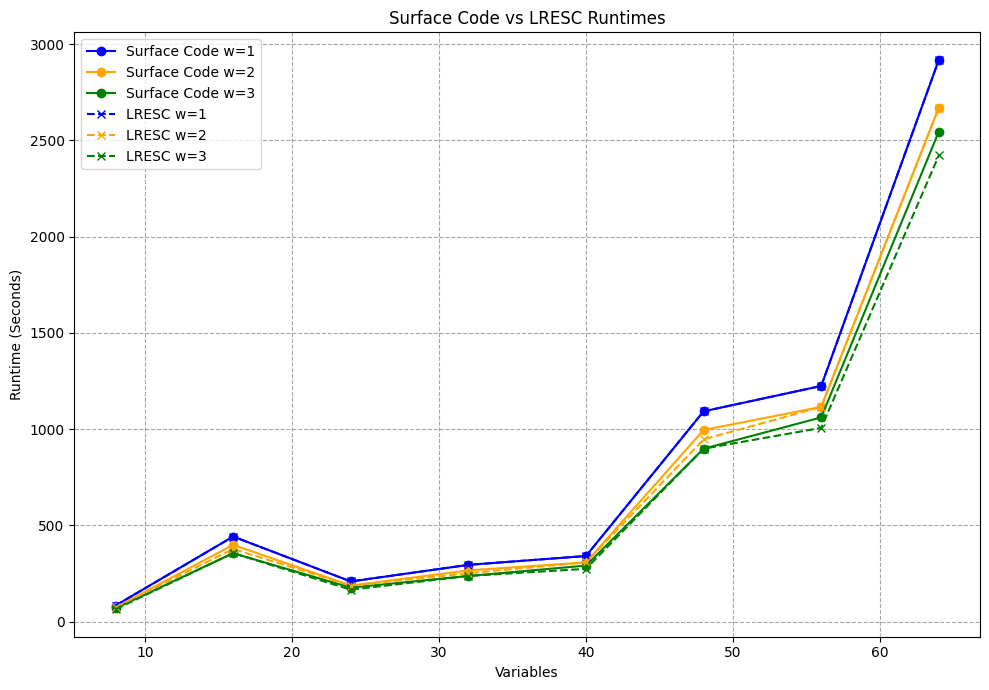

In [11]:
variables = [8, 16, 24, 32, 40, 48, 56, 64]

surface_code_runtimes = {
    1: [83.78, 442.28, 208.98, 295.26, 341.26, 1093.0, 1224.61, 2919.13],
    2: [74.21, 399.13, 187.55, 266.46, 307.96, 995.84, 1115.75, 2670.7],
    3: [69.42, 355.98, 176.83, 237.65, 291.32, 898.69, 1061.33, 2546.48]
}

lresc_runtimes = {
    1: [83.78, 442.28, 208.98, 295.26, 341.26, 1093.0, 1224.61, 2919.13],
    2: [74.21, 377.55, 187.55, 252.05, 307.96, 947.26, 1115.75, 2670.7],
    3: [64.63, 355.98, 166.12, 237.65, 274.67, 898.69, 1006.9, 2422.26]
}

plt.figure(figsize=(10, 7))

# Surface Code Runtimes
plt.plot(variables, surface_code_runtimes[1], marker='o', linestyle='-', color='blue', label='Surface Code w=1')
plt.plot(variables, surface_code_runtimes[2], marker='o', linestyle='-', color='orange', label='Surface Code w=2')
plt.plot(variables, surface_code_runtimes[3], marker='o', linestyle='-', color='green', label='Surface Code w=3')

# LRESC Runtimes
plt.plot(variables, lresc_runtimes[1], marker='x', linestyle='--', color='blue', label='LRESC w=1')
plt.plot(variables, lresc_runtimes[2], marker='x', linestyle='--', color='orange', label='LRESC w=2')
plt.plot(variables, lresc_runtimes[3], marker='x', linestyle='--', color='green', label='LRESC w=3')

plt.xlabel('Variables')
plt.ylabel('Runtime (Seconds)')
plt.title('Surface Code vs LRESC Runtimes')
plt.legend(loc='upper left')
plt.grid(True, which="both", linestyle='--', color='gray', alpha=0.7)
plt.tight_layout()
plt.show()

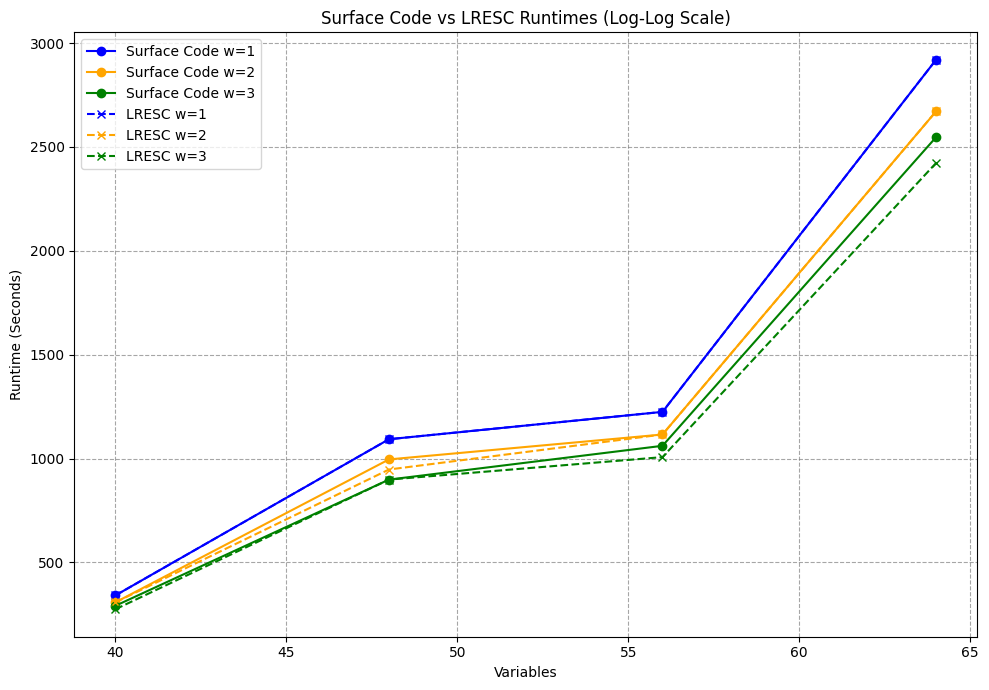

In [12]:
variables = [40, 48, 56, 64]

surface_code_runtimes = {
    1: [341.26, 1093.0, 1224.61, 2919.13],
    2: [307.96, 995.84, 1115.75, 2670.7],
    3: [291.32, 898.69, 1061.33, 2546.48]
}

lresc_runtimes = {
    1: [341.26, 1093.0, 1224.61, 2919.13],
    2: [307.96, 947.26, 1115.75, 2670.7],
    3: [274.67, 898.69, 1006.9, 2422.26]
}

plt.figure(figsize=(10, 7))

# Surface Code Runtimes
plt.plot(variables, surface_code_runtimes[1], marker='o', linestyle='-', color='blue', label='Surface Code w=1')
plt.plot(variables, surface_code_runtimes[2], marker='o', linestyle='-', color='orange', label='Surface Code w=2')
plt.plot(variables, surface_code_runtimes[3], marker='o', linestyle='-', color='green', label='Surface Code w=3')

# LRESC Runtimes
plt.plot(variables, lresc_runtimes[1], marker='x', linestyle='--', color='blue', label='LRESC w=1')
plt.plot(variables, lresc_runtimes[2], marker='x', linestyle='--', color='orange', label='LRESC w=2')
plt.plot(variables, lresc_runtimes[3], marker='x', linestyle='--', color='green', label='LRESC w=3')

plt.xlabel('Variables')
plt.ylabel('Runtime (Seconds)')
plt.title('Surface Code vs LRESC Runtimes (Log-Log Scale)')
plt.legend(loc='upper left')
plt.grid(True, which="both", linestyle='--', color='gray', alpha=0.7)
plt.tight_layout()
plt.show()

## **Curve Fitting** <a id="curves"></a>

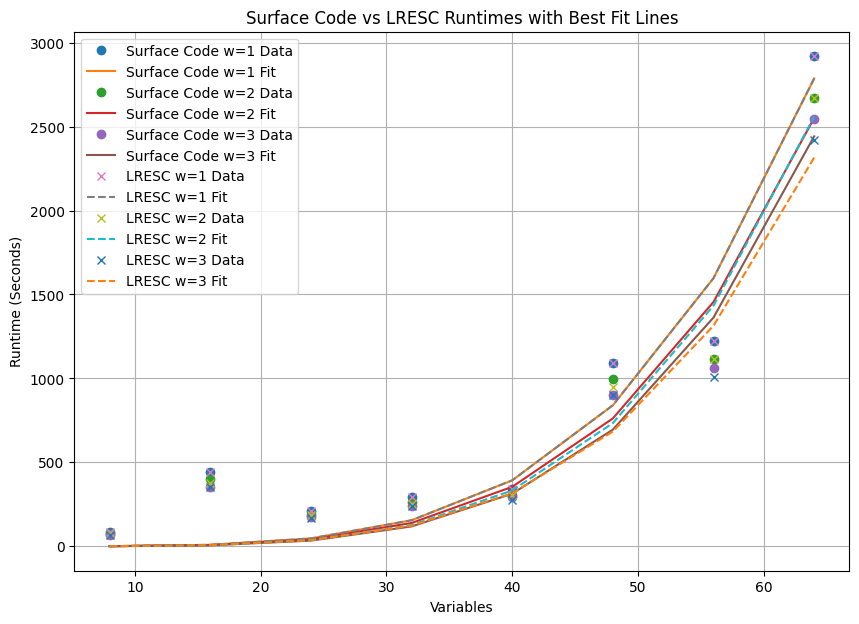

Surface Code Fit Parameters:
w=1: a=0.00008, b=4.1689
w=2: a=0.00007, b=4.2019
w=3: a=0.00003, b=4.3690

LRESC Fit Parameters:
w=1: a=0.00008, b=4.1689
w=2: a=0.00004, b=4.3426
w=3: a=0.00005, b=4.2417


In [13]:
variables = np.array([8, 16, 24, 32, 40, 48, 56, 64])

surface_code_runtimes = {
    1: np.array([83.78, 442.28, 208.98, 295.26, 341.26, 1093.0, 1224.61, 2919.13]),
    2: np.array([74.21, 399.13, 187.55, 266.46, 307.96, 995.84, 1115.75, 2670.7]),
    3: np.array([69.42, 355.98, 176.83, 237.65, 291.32, 898.69, 1061.33, 2546.48])
}

lresc_runtimes = {
    1: np.array([83.78, 442.28, 208.98, 295.26, 341.26, 1093.0, 1224.61, 2919.13]),
    2: np.array([74.21, 377.55, 187.55, 252.05, 307.96, 947.26, 1115.75, 2670.7]),
    3: np.array([64.63, 355.98, 166.12, 237.65, 274.67, 898.69, 1006.9, 2422.26])
}

# Define the model function to fit
def model_func(x, a, b):
    return a * np.power(x, b)

# Fit the model to the data
surface_code_fits = {}
lresc_fits = {}

for w in surface_code_runtimes:
    popt, _ = curve_fit(model_func, variables, surface_code_runtimes[w])
    surface_code_fits[w] = popt

for w in lresc_runtimes:
    popt, _ = curve_fit(model_func, variables, lresc_runtimes[w])
    lresc_fits[w] = popt

plt.figure(figsize=(10, 7))

# Surface Code Runtimes
for w in surface_code_runtimes:
    plt.plot(variables, surface_code_runtimes[w], marker='o', linestyle='', label=f'Surface Code w={w} Data')
    plt.plot(variables, model_func(variables, *surface_code_fits[w]), linestyle='-', label=f'Surface Code w={w} Fit')

# LRESC Runtimes
for w in lresc_runtimes:
    plt.plot(variables, lresc_runtimes[w], marker='x', linestyle='', label=f'LRESC w={w} Data')
    plt.plot(variables, model_func(variables, *lresc_fits[w]), linestyle='--', label=f'LRESC w={w} Fit')

plt.xlabel('Variables')
plt.ylabel('Runtime (Seconds)')
plt.title('Surface Code vs LRESC Runtimes with Best Fit Lines')
plt.legend()
plt.grid(True)
plt.show()

print("Surface Code Fit Parameters:")
for w, params in surface_code_fits.items():
    print(f"w={w}: a={params[0]:.5f}, b={params[1]:.4f}")

print("\nLRESC Fit Parameters:")
for w, params in lresc_fits.items():
    print(f"w={w}: a={params[0]:.5f}, b={params[1]:.4f}")